## STEP 1: Mount Google Drive 
##### to get access to data set and for storage of created training files (checkpoints, models, etc)

*  ***you must choose only Option A or B***




**Assumes following directory structure**

*  ***important: the csv, and record files will be generated in cells below***



```
project_directory/
        ├─ data/
        │    ├── images/
        │    │      ├── armas (1).jpg
        │    │      ├── armas (2).jpg
        │    │      └── ...
        │    ├── train_labels/
        │    │      ├── armas (1).xml
        │    │      ├── armas (2).xml
        │    │      └── ...
        │    ├── test_labels/
        │    │      ├── armas (10).xml
        │    │      ├── armas (20).xml
        │    │      └── ...
        │    ├── label_map.pbtxt
        │    ├── test_labels.csv
        │    ├── train_labels.csv
        │    ├── test_labels.record
        │    └── train_labels.record
        └─ models/
             ├─ research/
             │      ├── fine_tuned_model/
             │      │         ├── frozen_inference_graph.pb
             │      │         └── ...
             │      │         
             │      ├── pretrained_model/
             │      │         ├── frozen_inference_graph.pb
             │      │         └── ...
             │      │         
             │      ├── object_detection/
             │      │         ├── utils/
             │      │         ├── samples/
             │      │         │      ├── samples/ 
             │      │         │      │       ├── configs/             
             │      │         │      │       │     ├── ssd_mobilenet_v2_coco.config
             │      │         │      │       │     ├── rfcn_resnet101_pets.config
             │      │         │      │       │     └── ...
             │      │         │      │       └── ... 
             │      │         │      └── ...                                
             │      │         ├── export_inference_graph.py
             │      │         ├── model_main.py
             │      │         └── ...
             │      │         
             │      ├── training/
             │      │         ├── events.out.tfevents.xxxxx
             │      │         └── ...               
             │      └── ...
             └── ...




Checking if drive is mounted and can access folders

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/
%ls

root_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/"
print("root directory="+root_dir)
%ls {root_dir}

base_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/"
print("base directory="+base_dir)
%ls {base_dir}

data_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/Data/"
print("data directory="+data_dir)
%ls {data_dir}

models_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/"
print("models directory="+models_dir)
%ls {models_dir}

models_research_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/research/"
print("models directory="+models_research_dir)
%ls {models_research_dir}

object_detect_dir = models_research_dir + "/object_detection"
object_detect_protos = object_detect_dir + "/protos/*.protos"
%ls {object_detect_dir}


/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0
 Data/                               Run2_copy/
 eval_result.docx                    tf-nightly.ipynb
 fine_tuned_model/                   training/
 fine_tuned_model_new/               training1/
 LSBDMTrainingEfficientnetD0.ipynb   training_copy/
 models/                            'training steps.docx'
root directory=/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/
 Data/                               Run2_copy/
 eval_result.docx                    tf-nightly.ipynb
 fine_tuned_model/                   training/
 fine_tuned_model_new/               training1/
 LSBDMTrainingEfficientnetD0.ipynb   training_copy/
 models/                            'training steps.docx'
base directory=/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/
 Data/                               Run2_copy/
 eval_result.docx                    tf-nightly.ipynb
 fine_tuned_model/                   training/
 fine_tuned_model_new/  

## STEP 3: Install Required Packages for Colab environment
##### colab has install basic packages like Tensorflow,etc. but anything additional you will need to install next

***you can run !pip list to see what is currently installed***

In [3]:
print("Currently Installed")
!pip list

print("\n\n")
!sudo apt-get update   #update the location of packages in case they have moved
print("installing protobuf-compiler python-pil python-lxml and python-tk")
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

print("\n\n")

print("installing Cython contextlib2 pillow lxml matplotlib")

!pip install -qq Cython contextlib2 pillow lxml matplotlib



print("\n\n")
print("installing pycocotools")

!pip install -qq pycocotools

Currently Installed
Package                       Version        
----------------------------- ---------------
absl-py                       0.10.0         
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
argon2-cffi                   20.1.0         
asgiref                       3.3.0          
astor                         0.8.1          
astropy                       4.1            
astunparse                    1.6.3          
async-generator               1.10           
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.2.0         
audioread                     2.1.9          
autograd                      1.3            
Babel                         2.8.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bleach                        3.2.1          
blis          

**Training testing split**

In [ ]:

%cd {data_dir}
!ls annotations/* | sort -R | head -195 | xargs -I{} mv {} test_labels/


# Moves the rest of labels '2687' i.e 80 % labels to the training dir: `train_labels`
!ls annotations/* | xargs -I{} mv {} train_labels/

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data


**Checking training testing labels directory**

In [5]:
train_labels_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/Data/train_labels"
print("train label directory="+train_labels_dir)
#%ls {train_label_dir}

test_labels_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/Data/test_labels"
print("test label directory="+test_labels_dir)
#%ls {test_label_dir}

print("data  directory="+ data_dir)

%ls -1 {train_labels_dir} | wc -l


%ls -1 {test_labels_dir} | wc -l


images_dir = "/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/Data/images"
print("images  directory="+ images_dir)


%ls -1 {images_dir} | wc -l

train label directory=/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/Data/train_labels
test label directory=/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/Data/test_labels
data  directory=/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/Data/
623
167
images  directory=/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/Data/images
671


# STEP 4: Import modules you will use  AND install Object Detection API for colab

In [6]:
from __future__ import division, print_function, absolute_import

import pandas as pd
import numpy as np
import csv
import re
import cv2 


import glob
import xml.etree.ElementTree as ET

import io
import tensorflow.compat.v1 as tf

from PIL import Image
from collections import namedtuple, OrderedDict

import shutil
import urllib.request
import tarfile

from google.colab import files
#print out version of tf
print(tf.__version__)

2.3.0


## Install Object Detection API  AND put model/research/slim directory in the colab's path environment variables 
#### *(note it assume that you have the Object Detection API code on the Google Drive already ---see file structure at top)*

In [55]:
# downloads the models
%cd {base_dir}
!git clone --q https://github.com/tensorflow/models.git

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0


In [7]:
# MUST do each time restart colab kernel
# INSTALL Object Detection API inside the Colab, as sits above TF2
# this will take several minutes as it will copy over all of the object_detection files
# you have mounted in project_folder/models/research/object_detection
# as you can see by the output of this cell it copies them into the colab
# environment at build/lib/object_detection

#this this is what I need to make the object_detection get installed

print(models_research_dir)
%cd {models_research_dir}
#%ls
#!python setup.py install   # from the models/reasearch


#install tf_slim
!pip install tf_slim

/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/research/
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
     |████████████████████████████████| 358kB 13.4MB/s 


In [56]:
# compiles the proto buffers
%cd {models_research_dir}
!protoc object_detection/protos/*.proto --python_out=.

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research


In [57]:
import os
%cd {models_research_dir}
os.environ['PYTHONPATH'] += ':./:./slim/'
print(os.environ['PYTHONPATH'])
os.environ['PYTHONPATH'] += ':../official/:../../models'
print(os.environ['PYTHONPATH'])

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
/env/python:./:./slim/:../official/:../../models:./:./slim/
/env/python:./:./slim/:../official/:../../models:./:./slim/:../official/:../../models


In [ ]:
%cd {models_research_dir}
%ls 
%cd ..
%ls

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
a3c_blogpost/        deep_speech/            object_detection/
adversarial_text/    delf/                   object_detection.egg-info/
attention_ocr/       deploy/                 pcl_rl/
audioset/            dist/                   README.md
autoaugment/         efficient-hrl/          rebar/
build/               lfads/                  sequence_projection/
cognitive_planning/  lstm_object_detection/  setup.py
cvt_text/            marco/                  slim/
deeplab/             nst_blogpost/           vid2depth/
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models
AUTHORS     community/       ISSUES.md  official/  README.md
CODEOWNERS  CONTRIBUTING.md  LICENSE    orbit/     research/


In [58]:
# optional test to see if install and compile went well
# testing the model builder

%cd {models_research_dir}
!python3 object_detection/builders/model_builder_test.py

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
2020-11-05 17:54:25.812712: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


XML to CSV

In [ ]:
%cd {data_dir}
#%pwd
# %ls {data_dir}

#%cd /content/drive/Shared drives/RetrainTF2DataAndModels/DetectionWeaponsExample_CodeLabBased/data

# images extension
images_extension = 'jpg'

# takes the path of a directory that contains xml files and converts
#  them to one csv file.

# returns a csv file that contains: image name, width, height, class, xmin, ymin, xmax, ymax.
# note: if the xml file contains more than one box/label, it will create more than one row for 
#the same image. each row contains the info for an individual box. 
def xml_to_csv(path):
  classes_names = []
  xml_list = []

  for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
      classes_names.append(member[0].text)
      value = (root.find('filename').text ,
               int(root.find('size')[0].text),
               int(root.find('size')[1].text),
               member[0].text,
               int(member[4][0].text),
               int(member[4][1].text),
               int(member[4][2].text),
               int(member[4][3].text))
      xml_list.append(value)
  column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name) 
  classes_names = list(set(classes_names))
  classes_names.sort()
  return xml_df, classes_names

# for both the train_labels and test_labels csv files, it runs the xml_to_csv() above.
for label_path in ['train_labels', 'test_labels']:
  image_path = os.path.join(os.getcwd(), label_path)
  xml_df, classes = xml_to_csv(label_path)
  xml_df.to_csv(f'{label_path}.csv', index=None)
  print(f'Successfully converted {label_path} xml to csv.')

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data
Successfully converted train_labels xml to csv.
Successfully converted test_labels xml to csv.


In [ ]:
'''
checks if the images box position is placed within the image.
note: while this doesn't checks if the boxes/annotations are correctly
 placed around the object, Tensorflow will throw an error if this occured.
 path to images
'''


%cd {data_dir}
images_path = 'images'
for CSV_FILE in ['train_labels.csv', 'test_labels.csv']:
  with open(CSV_FILE, 'r') as fid:  
      print('[*] Checking file:', CSV_FILE) 
      file = csv.reader(fid, delimiter=',')
      first = True 
      cnt = 0
      error_cnt = 0
      error = False
      for row in file:
          if error == True:
              error_cnt += 1
              error = False         
          if first == True:
              first = False
              continue     
          cnt += 1      
          name, width, height, xmin, ymin, xmax, ymax = row[0], int(row[1]), int(row[2]), int(row[4]), int(row[5]), int(row[6]), int(row[7])     
          path = os.path.join(images_path, name)
          img = cv2.imread(path)         
          if type(img) == type(None):
              error = True
              print('Could not read image', img)
              continue     
          org_height, org_width = img.shape[:2]     
          if org_width != width:
              error = True
              print('Width mismatch for image: ', name, width, '!=', org_width)     
          if org_height != height:
              error = True
              print('Height mismatch for image: ', name, height, '!=', org_height) 
          if xmin > org_width:
              error = True
              print('XMIN > org_width for file', name)  
          if xmax > org_width:
              error = True
              print('XMAX > org_width for file', name)
          if ymin > org_height:
              error = True
              print('YMIN > org_height for file', name)
          if ymax > org_height:
              error = True
              print('YMAX > org_height for file', name)
          if error == True:
              print('Error for file: %s' % name)
              print()
      print()
      print('Checked %d files and realized %d errors' % (cnt, error_cnt))
      print("-----")

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data
[*] Checking file: train_labels.csv


KeyboardInterrupt: ignored

In [ ]:
# Creating the `label_map.pbtxt` file
label_map_path = os.path.join("label_map.pbtxt")

pbtxt_content = ""


#creats a pbtxt file the has the class names.
for i, class_name in enumerate(classes):
    # display_name is optional.
    pbtxt_content = (
        pbtxt_content
        + "item {{\n    id: {0}\n    name: '{1}'\n  }}\n\n".format(i + 1, class_name)
    )
    
    
pbtxt_content = pbtxt_content.strip()
with open(label_map_path, "w") as f:
    f.write(pbtxt_content)
    

print(len(classes))

NameError: ignored

In [11]:
%cd {data_dir}
%cat label_map.pbtxt

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data
item {
    id: 1
    name: 'Bad'
  }

item {
    id: 2
    name: 'Caution'
  }

item {
    id: 3
    name: 'Good'
  }

In [59]:
%cd {models_research_dir}
#!pip install tensorflow-object-detection-api
!python setup.py install   # from the models/reasearch

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
running install
running bdist_egg
running egg_info
creating object_detection.egg-info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/__init__.py -> build/lib/object_detection
copying object_detection/eval_util.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_

***HARD CODED MUST FIX: * The following hard codes for the class pistol to convert to the class number 1. Need to read in the label_map.pbtxt file instead and parse it for multiple classes and create a map so can look up the id for the passed row_label ---see code below**

In [ ]:
%cd /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research

from object_detection.utils import dataset_util


#DATA_BASE_PATH = '/content/drive/My Drive/DetectionWeaponsExample_CodeLabBased/data/'
#images_dir = '/content/drive/My Drive/DetectionWeaponsExample_CodeLabBased/data/images/'
DATA_BASE_PATH = '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/'
images_dir = '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/images/'
# problem with the data_dir not evaluating the 'My Drive' into My Drive
#DATA_BASE_PATH = data_dir + '/'
#image_dir = data_dir +'/images/'
# DATA_BASE_PATH = "/content/drive/Shared drives/RetrainTF2DataAndModels/DetectionWeaponsExample_CodeLabBased/data"
# images_dir = "/content/drive/Shared drives/RetrainTF2DataAndModels/DetectionWeaponsExample_CodeLabBased/data/images"
# print("Data base path " + DATA_BASE_PATH)

print("Images path " + images_dir)

#do a list to see if the record file already exists
#this will falue when no 'My Drive' and using only My Drive
#%ls {DATA_BASE_PATH}

#FIX- THIS IS HARDCODED method for converting the class label to its id instead!!!
def class_text_to_int(row_label):
    if row_label == 'Good':
        return 1
    elif row_label == 'Caution':
        return 2
    elif row_label == 'Bad':
        return 3
    else:
        None

#some kind of parsing function that create a special DataSet for parsing each image in a loop
def split(df, group):
		data = namedtuple('data', ['filename', 'object'])
		gb = df.groupby(group)
		return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

#This is a function that reads in image from a file (using tf.io package) and its bounding box information and creates
# and instance of tf.train.Example that can be used to add to a TFRecord
def create_tf_example(group, path):
		with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
				encoded_jpg = fid.read()
    #open up io stream to file containing image
		encoded_jpg_io = io.BytesIO(encoded_jpg)
    #open up Image file pointer using the stream previously opened
		image = Image.open(encoded_jpg_io)
    #retrieve size of image from the data in the Image file pointer (stored in the jpg file)
		width, height = image.size
    
    
		filename = group.filename.encode('utf8')
		image_format = b'jpg'
    #setup array to represent all the bounding boxes for this image
    # bounding box i upper left point = (xmins[i],ymins[i])  lower right point =(xmaxs[i], ymaxs[i])
    # class label of ith' box stored in classes_text[i]
    # also as building out this array add to classes[] any unique new classes found
		xmins = []
		xmaxs = []
		ymins = []
		ymaxs = []
		classes_text = []
		classes = []

    #cycle through the rows in the label csv file pased and add in the bounding box info into arrays
    #    and corresponding class label.
		for index, row in group.object.iterrows():
				xmins.append(row['xmin'] / width)
				xmaxs.append(row['xmax'] / width)
				ymins.append(row['ymin'] / height)
				ymaxs.append(row['ymax'] / height)
				classes_text.append(row['class'].encode('utf8'))
				classes.append(class_text_to_int(row['class']))

    #build out a tf.train.Example using all the read in information for this image and its bounding boxes
    # this will be used later to create a TFRecord
    # see https://www.tensorflow.org/tutorials/load_data/tfrecord  for information about tf.train.Example and TFRecord format
    # as you can see includes for each image: 
    #              height, width, filename, the actual image pixel values, image format, 
    #              and bounding boxes (as arrays of xmin,ymin and xmax,ymax representing the lower-left and upper-right points) 
		tf_example = tf.train.Example(features=tf.train.Features(feature={
				'image/height': dataset_util.int64_feature(height),
				'image/width': dataset_util.int64_feature(width),
				'image/filename': dataset_util.bytes_feature(filename),
				'image/source_id': dataset_util.bytes_feature(filename),
				'image/encoded': dataset_util.bytes_feature(encoded_jpg),
				'image/format': dataset_util.bytes_feature(image_format),
				'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
				'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
				'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
				'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
				'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
				'image/object/class/label': dataset_util.int64_list_feature(classes),
		}))
		return tf_example

#go through the train_labels.csv and afterwards test_lables.csv and create TFRecord files for each
#  pd is associated with loaded python Pandas module imported and used to read csv files
for csv in ['train_labels', 'test_labels']:
  #use TFrecordWriter to write records to a TFRecord file as specified in path
  #see https://www.tensorflow.org/api_docs/python/tf/io/TFRecordWriter
  label_file = DATA_BASE_PATH + csv + '.record'
  print(".........going to save TFRecord to " + label_file)
 # label_file = "/"
  
  writer = tf.io.TFRecordWriter(DATA_BASE_PATH + csv + '.record')
  #writer = tf.io.TFRecordWriter(dummy2)
  path = os.path.join(images_dir)

  #read in all the rows in the csv file using pandas module into a pandas DataFrame datastructure
  #see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
  #see https://pandas.pydata.org/pandas-docs/stable/reference/frame.html 
  # need file to open = "/gdrive/My Drive/iLab/Covid_ID/Retraining/DetectionWeaponsExample/data/" + csv + ".csv"
  print(DATA_BASE_PATH + csv + '.csv')
  examples = pd.read_csv(DATA_BASE_PATH + csv + '.csv')
  

  #For each image group it with its bounding boxes
  grouped = split(examples, 'filename')

  #for each image and its bounding boxes create an instance of tf.train.Example that is
  #  written out into a file that is the created TFRecord file
  # see https://www.tensorflow.org/tutorials/load_data/tfrecord 
  # for information about tf.train.Example and TFRecord format
  for group in grouped:
      print(" group in loop ")
      print(group)
      tf_example = create_tf_example(group, path)
      writer.write(tf_example.SerializeToString())
    
  writer.close()
  output_path = os.path.join(os.getcwd(), DATA_BASE_PATH + csv + '.record')
  print('Successfully created the TFRecords: {}'.format(DATA_BASE_PATH +csv + '.record'))

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
Images path /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/images/
.........going to save TFRecord to /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/train_labels.record
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/train_labels.csv
 group in loop 
data(filename='Bad1.jpg', object=     filename  width  height class  xmin  ymin  xmax  ymax
537  Bad1.jpg    300     168   Bad     1    10   300   168)
 group in loop 
data(filename='Bad10.jpg', object=       filename  width  height class  xmin  ymin  xmax  ymax
1050  Bad10.jpg    300     168   Bad     1     5   289   168)
 group in loop 
data(filename='Bad100.jpg', object=       filename  width  height class  xmin  ymin  xmax  ymax
797  Bad100.jpg    201     251   Bad    17     1   160   250)
 group in loop 
data(filename='Bad101.jpg', object=       filename  width  height class  xmin  ymin  xmax  ymax
791  Bad101.jp

**Training Model**


*  using selected model retrain
*   Input expected is TFRecord for training and evaluation



**Select model wish to retrain from object detection api set of pretrained models AND specify some basic training parameters**
[ ]


In [60]:
##change chosen model to deploy different models available in the TF2 object detection zoo
MODELS_CONFIG = {
    'efficientdet-d0': {
        #this one
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d0_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
    'efficientdet-d1': {
        'model_name': 'efficientdet_d1_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d1_640x640_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d1_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
    'efficientdet-d2': {
        'model_name': 'efficientdet_d2_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d2_768x768_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d2_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
        'efficientdet-d3': {
        'model_name': 'efficientdet_d3_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d3_896x896_coco17_tpu-32.config',
        'pretrained_checkpoint': 'efficientdet_d3_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
      'efficientdet-d4': {
          #this one
        'model_name': 'efficientdet_d4_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d4_1024x1024_coco17_tpu-32.config',
        'pretrained_checkpoint': 'efficientdet_d4_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },#this one
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_320x320_coco17_tpu-8',
        'base_pipeline_file': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz',
        'batch_size': 16
    }
}

#in this tutorial we implement the lightweight, smallest state of the art efficientdet model
#if you want to scale up tot larger efficientdet models you will likely need more compute!

###change this according to your model
chosen_model = 'efficientdet-d0'

num_steps = 40000 #16000 #40,000 The more steps, the longer the training. Increase if your loss function is still decreasing and validation metrics are increasing. 
num_eval_steps = 500 #Perform evaluation after so many steps

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']
batch_size = MODELS_CONFIG[chosen_model]['batch_size'] #if you can fit a large batch in memory, it may speed up your training


print("Model Chosen for Retraining")
print(" name "+ model_name)
print(" pretrained_checkpoint " + pretrained_checkpoint)
print(" base_pipeline_file " + base_pipeline_file)
print(" batch_size " + str(batch_size))

Model Chosen for Retraining
 name efficientdet_d0_coco17_tpu-32
 pretrained_checkpoint efficientdet_d0_coco17_tpu-32.tar.gz
 base_pipeline_file ssd_efficientdet_d0_512x512_coco17_tpu-8.config
 batch_size 16


**specify the TFRecord files for training**

In [62]:
# See previous cell where created record files for location and name of files
%cd {data_dir}
test_record_fname =  '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/test_labels.record'
train_record_fname = '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/train_labels.record'
%cd {data_dir}
label_map_pbtxt_fname =  '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/label_map.pbtxt'


    
print("Files used in Training")
print(test_record_fname)
print(train_record_fname)
print(label_map_pbtxt_fname)

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data
Files used in Training
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/test_labels.record
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/train_labels.record
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/label_map.pbtxt


**get the pretrained model and put it into a special new deploy directory**

In [63]:
#DO ONLY ONCE

#download pretrained weights
#create a folder under models/research/ named deploy

deploy_path = models_research_dir + "/deploy/"

%mkdir {deploy_path}
%cd {deploy_path}

    
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint

!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/deploy
--2020-11-05 17:56:47--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.73.240, 2607:f8b0:4004:814::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.73.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  84.4MB/s    in 0.3s    

2020-11-05 17:56:47 (84.4 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



**now get the pretrained model's configuration file and put it in the deploy directory created in cell above**

In [64]:
deploy_path = models_research_dir + "/deploy/"
%cd {deploy_path}
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/deploy
--2020-11-05 17:56:51--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’

ssd_efficientdet_d0 100%[===================>]   4.52K  --.-KB/s    in 0.001s  

2020-11-05 17:56:51 (6.17 MB/s) - ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’ saved [4630/4630]



### setup parameters to pass to training script for Object Detect API on TF2


*   pipeline_filename = the configuration file for training
*   fine_tune_checkpoint = checkpoint file of model will retrain that you will start from
*   num_classes= number of classes you will retrain to (from your label file)



In [39]:
%cd {models_dir}

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models


In [65]:
# at C:\tensorflow\models\research\object_detection\utils\label_map_util.py
# rather than the tf2 version installed in this jupyter notebooks
# environment it is launched from which is tf2
# because the import below in the function get_num_classes
#   "from object_detection.utils import label_map_util"
# is mapping to wrong object detection api
#prepare
print(" Version of tf " + tf.__version__)
deploy_path = models_research_dir + "/deploy/"

#pipeline_fname = deploy_path + base_pipeline_file
#fine_tune_checkpoint = deploy_path + model_name + '/checkpoint/ckpt-0'
%cd {deploy_path}
pipeline_fname = str(os.getcwd()) + os.path.sep + base_pipeline_file
fine_tune_checkpoint = str(os.getcwd()) + os.path.sep + model_name + '/checkpoint/ckpt-0'



print("pipeline_fname " + pipeline_fname)
print("fine_tune_checkpoint " + fine_tune_checkpoint)



    
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=3, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

#WARNING:  you must use relative path as 'My Drive' or 'Shared drives' in a path will fail to open or find
# the file in the get_num_classes function ....so cd to directory and call with local filename
# need to be in the models/research directory when execute the get_num_classes function as it needs to find object_detection
relative_path_to_labelfile = "../../Data/label_map.pbtxt"
print(relative_path_to_labelfile)
#num_classes = get_num_classes(label_map_pbtxt_fname)
%cd {models_research_dir}
print("--------------")
%ls
num_classes = get_num_classes(relative_path_to_labelfile)


print("Number of classes= "+ str(num_classes))
print("Label file "+ label_map_pbtxt_fname)

 Version of tf 2.3.0
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/deploy
pipeline_fname /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/deploy/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
fine_tune_checkpoint /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/deploy/efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0
../../Data/label_map.pbtxt
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
--------------
a3c_blogpost/        deep_speech/            object_detection/
adversarial_text/    delf/                   object_detection.egg-info/
attention_ocr/       deploy/                 pcl_rl/
audioset/            dist/                   README.md
autoaugment/         efficient-hrl/          rebar/
build/               lfads/                  sequence_projection/
cognitive_planning/  lstm_object_detection/  setup.py
cvt_text/            marco/                  slim/
deeplab/          

### Modify the configuration file to update with some training values

In [66]:
#write custom configuration file by slotting our dataset, model checkpoint, and training parameters into the base pipeline file

import re
import pathlib

%cd {deploy_path}

    
print(" path cwd " + str(pathlib.Path.cwd()))
print("reading original configuration file name= " + str(pipeline_fname))

print("writing custom configuration file name= " + str(os.getcwd()) + os.path.sep + "pipeline_file.config")
      
      
with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    #fine-tune checkpoint type
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
        
    f.write(s)


    # problem --can't open files with ' ' inside the pathname 


/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/deploy
 path cwd /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/deploy
reading original configuration file name= /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/deploy/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
writing custom configuration file name= /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/deploy/pipeline_file.config


In [67]:
config_file = deploy_path + "pipeline_file.config"
print(config_file)
%cat {config_file}

/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/research//deploy/pipeline_file.config
 # SSD with EfficientNet-b0 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d0).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 3
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator 

In [68]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize    
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn't guaranteed
gpu = GPUs[0]

def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print('GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB'.format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm() 

Gen RAM Free: 12.5 GB  I Proc size: 403.6 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [69]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
try:
  import GPUtil as GPU
  GPUs = GPU.getGPUs()
  device='/gpu:0'
except:
  device='/cpu:0'

##run the trainer by calling a script for Obj Detect API on TF2 called model_main_tf2 which takes the following parameters


*   pipeline_file = configuration file used in training created in previous stem
*   model_dir = directory where will write results of training including checkpoints and tensorboard event file.



In [73]:
!pip install lvis

In [74]:
pipeline_file = deploy_path + 'pipeline_file.config'
#model_dir = base_dir + '/training/'
model_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/training1/"

print(" options")
print("    pipeline_config_path= "+ pipeline_file)
print("    model_dir= " + models_dir)
print("    alsologtostderr")
print("    num_train_steps= "+ str(num_steps))
print("    sample_1_of_n_eval_examples= " + str(1))
print("    num_eval_steps= " + str(num_eval_steps))

training_script = object_detect_dir + "/model_main_tf2.py"

#must be in the diretory that the object_detection folder is stored (models/research)
%cd {models_research_dir}
#!python /content/models/research/object_detection/model_main_tf2.py \
!python {training_script} \
        --pipeline_config_path={pipeline_file} \
        --model_dir={model_dir} \
        --alsologtostderr \
        --num_train_steps={num_steps} \
        --sample_1_of_n_eval_examples=1 \
        --num_eval_steps={num_eval_steps}

 options
    pipeline_config_path= /content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/research/deploy/pipeline_file.config
    model_dir= /content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/
    alsologtostderr
    num_train_steps= 40000
    sample_1_of_n_eval_examples= 1
    num_eval_steps= 500
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
2020-11-05 18:00:55.507458: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-05 18:00:58.120542: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-05 18:00:58.153810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-05 18:00:58.154390: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Fou

In [76]:
#see where our model saved weights...
model_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/training1"
%ls {model_dir}

 checkpoint                            'Copy of ckpt-24.data-00000-of-00001'
 ckpt-1.data-00000-of-00001            'Copy of ckpt-24.index'
 ckpt-1.index                          'Copy of ckpt-25.data-00000-of-00001'
 ckpt-35.index                         'Copy of ckpt-26.index'
 ckpt-36.index                         'Copy of ckpt-27.data-00000-of-00001'
 ckpt-38.index                         'Copy of ckpt-28.data-00000-of-00001'
 ckpt-39.data-00000-of-00001           'Copy of ckpt-28.index'
 ckpt-39.index                         'Copy of ckpt-29.data-00000-of-00001'
 ckpt-40.index                         'Copy of ckpt-29.index'
 ckpt-41.data-00000-of-00001           'Copy of ckpt-30.index'
 ckpt-41.index                         'Copy of ckpt-31.data-00000-of-00001'
'Copy of ckpt-10.data-00000-of-00001'  'Copy of ckpt-31.index'
'Copy of ckpt-10.index'                'Copy of ckpt-32.data-00000-of-00001'
'Copy of ckpt-11.index'                'Copy of ckpt-32.index'
'Copy of ckpt-12.ind

**Save model**

In [77]:
#run conversion script
import re
import numpy as np
deploy_path = "/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/research/deploy/"
pipeline_file = deploy_path + 'pipeline_file.config'
base_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0"
output_directory = base_dir + '/fine_tuned_model_new'
models_research_dir="/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/research/"
#place the model weights you would like to export here
last_model_path = model_dir



script_file = models_research_dir + os.path.sep + "object_detection" + os.path.sep + "exporter_main_v2.py"
    
print(last_model_path)
print(script_file)
print(pipeline_file)
print(output_directory)
!python {models_research_dir}/object_detection/exporter_main_v2.py \
  --trained_checkpoint_dir {last_model_path} --output_directory {output_directory} --pipeline_config_path {pipeline_file}

/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/training1
/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/research//object_detection/exporter_main_v2.py
/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/models/research/deploy/pipeline_file.config
/content/drive/'My Drive'/SocialDistance/LSBDMEfficientNetD0/fine_tuned_model_new
2020-11-05 18:05:01.618350: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-05 18:05:03.712472: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-05 18:05:03.755290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-05 18:05:03.755856: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pc

In [ ]:
%pwd
%cd ..
%pwd

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models


'/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models'

**Fine Tuned Model evaluation** on Test Data 



In [ ]:
from object_detection.utils import config_util
from object_detection.builders import model_builder
from object_detection.utils import label_map_util
#deploy_path = "/content/drive/'My Drive'/SocialDistance/DPDM/EfficientDetD0/models/research/deploy/"
pipeline_file = '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/fine_tuned_model/pipeline.config'
#pipeline_file = '/home/farstrider/TensorFlow/Deployments/efficientNet_16000steps_noSmallPeople/pipeline_file.config'
#recover our saved model
pipeline_config = pipeline_file
#generally you want to put the last ckpt from training in here
model_dir = '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/training1/ckpt-41'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join('/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/training1/ckpt-41'))
def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

#map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [ ]:
%pwd
%cd {models_research_dir}

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research


In [ ]:
!python3 '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/object_detection/model_main_tf2.py' \
    --pipeline_config_path='/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/fine_tuned_model/pipeline.config' \
    --model_dir='/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/fine_tuned_model/checkpoint/' \
    --checkpoint_dir='/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/fine_tuned_model/checkpoint/' \
    --run_once=True \
    --alsologtostderror

2020-10-27 19:28:14.516554: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
W1027 19:28:17.409800 140482491996032 model_lib_v2.py:925] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1027 19:28:17.410074 140482491996032 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1027 19:28:17.410182 140482491996032 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1027 19:28:17.410275 140482491996032 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1027 19:28:17.410399 140482491996032 model_lib_v2.py:940] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2020-10-27 19:28:17.422552: I tensorflow/stream_executor/pl

In [ ]:
%ls {base_dir}/
%pwd

 Data/                               models/      training1/
 fine_tuned_model/                   Run2_copy/   training_copy/
 LSBDMTrainingEfficientnetD0.ipynb   training/   'training steps.docx'


'/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research'

**Tensorboard** Evaluation


In [ ]:
logs_dir = base_dir + "/training1/train_log*"
%ls {logs_dir}

'/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/training1/train_log1':
events.out.tfevents.1603739899.14698aced20b.1539.10005.v2

'/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/training1/train_log2':
events.out.tfevents.1603759180.f40bddea6c1a.1654.10005.v2

'/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/training1/train_log3':
events.out.tfevents.1603777153.36c49d76bead.1486.10005.v2

'/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/training1/train_log4':
events.out.tfevents.1603816598.ddc3da09c971.1314.10005.v2


In [ ]:
# first install it
!pip install tensorboard


logs_dir = base_dir + "/training1/train_log4"
%ls {logs_dir}



%reload_ext tensorboard
%tensorboard --logdir {logs_dir}


**Inference**


In [ ]:
!printenv
%pwd
%cd {models_dir}
%pwd


CUDNN_VERSION=7.6.5.32
__EGL_VENDOR_LIBRARY_DIRS=/usr/lib64-nvidia:/usr/share/glvnd/egl_vendor.d/
LD_LIBRARY_PATH=/usr/lib64-nvidia
CLOUDSDK_PYTHON=python3
_=/usr/bin/printenv
LANG=en_US.UTF-8
HOSTNAME=ddc3da09c971
OLDPWD=/
CLOUDSDK_CONFIG=/content/.config
KMP_INIT_AT_FORK=FALSE
NVIDIA_VISIBLE_DEVICES=all
DATALAB_SETTINGS_OVERRIDES={"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\"172.28.0.2\""]}
TF2_BEHAVIOR=1
ENV=/root/.bashrc
PAGER=cat
NCCL_VERSION=2.7.8
TF_FORCE_GPU_ALLOW_GROWTH=true
JPY_PARENT_PID=24
NO_GCE_CHECK=True
PWD=/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
HOME=/root
LAST_FORCED_REBUILD=20201013
CLICOLOR=1
DEBIAN_FRONTEND=noninteractive
KMP_DUPLICATE_LIB_OK=True
LIBRARY_PATH=/usr/local/cuda/lib64/stubs
GCE_METADATA_TIMEOUT=0
GLIBCPP_FORCE_NEW=1
TBE_CREDS_ADDR=172.28.0.1:8008
TERM=xterm-color
SHELL=/bin/bash
GCS_READ_CACHE_BLOCK_SIZE_MB=16
PYTHONWARNINGS=ignore:::pip._internal.cli.base_command
MPLBACK

'/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models'

In [34]:

%pwd
%cd {models_dir}


/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models


In [36]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import os
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
import cv2

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

ImportError: ignored

In [ ]:
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
  """Wrapper function to visualize detections.

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
  """
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)

def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def load_grayscale_image_into_numpy_array(path):
  # read in image as grayscale cv2 image
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  # convert image to rgb
  backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
  return backtorgb.astype(np.uint8)

In [ ]:
def load_rgb_image_into_numpy_array(path):
  # read in image as grayscale cv2 image
  img = cv2.imread(path, cv2.IMREAD_COLOR)
  im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return im_rgb
  #return img
  # convert image to rgb
  #backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
  #return backtorgb.astype(np.uint8)


In [ ]:
pipeline_file = '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/fine_tuned_model/pipeline.config'
#recover our saved model
pipeline_config = pipeline_file
#generally you want to put the last ckpt from training in here
model_dir = '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/training1/ckpt-41'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
#from object_detection.builders import model_builder
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join('/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/training1/ckpt-41'))

def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

#map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [ ]:
import cv2
import glob
import os
from PIL import Image

# wherever your test images now live 
TEST_IMAGE_PATHS = glob.glob('/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/TestData_LBSDM/images/*.jpg')
textFile= '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/TestData_LBSDM/TestImagesTensorOutput_results3.txt'
file = open(textFile, "w")
for image_path in TEST_IMAGE_PATHS:
    # load image into np array
    image_np = load_rgb_image_into_numpy_array(image_path)
    # convert to input tensor ?
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    # run detect_fun on input tensor
    detections, predictions_dict, shapes = detect_fn(input_tensor)
    # start labels at 1 instead of 0?
    label_id_offset = 1
    # make a copy of np image
    image_np_with_detections = image_np.copy()
    # add bounding boxes and labels to image
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'][0].numpy(),
          (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
          detections['detection_scores'][0].numpy(),
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.5,
          agnostic_mode=False,
    )
    # get the output path for writing results (i'm tacking on bb_ to the names so i can easily identify them as
    # having been annotated)
    output_path = os.path.join(os.path.dirname(image_path), "results_3", "bb_" + os.path.basename(image_path))
    # convert to a PIL Image for writing
    save_image = Image.fromarray(image_np_with_detections)
    # write to file
    save_image.save(output_path)
    s3 = os.path.basename(image_path)+" tensor array:" + str(detections['detection_multiclass_scores'][0][:10])+'\n'
    file.write(s3)
    s4="     Prediction boxes ="+str(detections['detection_boxes'][0][:10]) + "\n"
    file.write(s4) 
file.close()

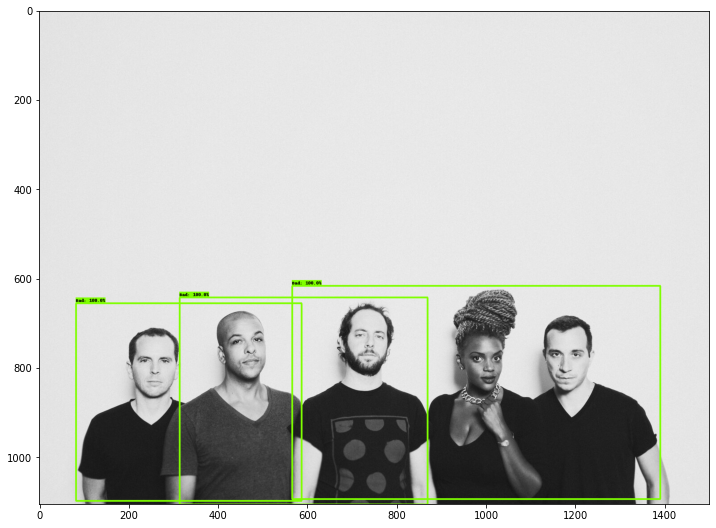

In [ ]:
#it takes a little longer on the first run and then runs at normal speed. 
import random
import cv2
import glob

TEST_IMAGE_PATHS = glob.glob('/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/output1/*.jpg')
image_path = random.choice(TEST_IMAGE_PATHS)
image_np = load_grayscale_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.5,
      agnostic_mode=False,
)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()

In [ ]:
%ls /content/drive/My\ Drive/SocialDistance/LSBDMEfficientNetD0/training/
from google.colab import files
files.download("/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/training/")

checkpoint                   ckpt-38.index
ckpt-35.data-00000-of-00001  ckpt-39.data-00000-of-00001
ckpt-35.index                ckpt-39.index
ckpt-36.data-00000-of-00001  ckpt-40.data-00000-of-00001
ckpt-36.index                ckpt-40.index
ckpt-37.data-00000-of-00001  ckpt-41.data-00000-of-00001
ckpt-37.index                ckpt-41.index
ckpt-38.data-00000-of-00001  train/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Evaluation on Validation Images**

In [ ]:
%cd /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/TestData_LBSDM
#%pwd
# %ls {data_dir}

#%cd /content/drive/Shared drives/RetrainTF2DataAndModels/DetectionWeaponsExample_CodeLabBased/data

# images extension
images_extension = 'jpg'

# takes the path of a directory that contains xml files and converts
#  them to one csv file.

# returns a csv file that contains: image name, width, height, class, xmin, ymin, xmax, ymax.
# note: if the xml file contains more than one box/label, it will create more than one row for 
#the same image. each row contains the info for an individual box. 
def xml_to_csv(path):
  classes_names = []
  xml_list = []

  for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
      classes_names.append(member[0].text)
      value = (root.find('filename').text ,
               int(root.find('size')[0].text),
               int(root.find('size')[1].text),
               member[0].text,
               int(member[4][0].text),
               int(member[4][1].text),
               int(member[4][2].text),
               int(member[4][3].text))
      xml_list.append(value)
  column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name) 
  classes_names = list(set(classes_names))
  classes_names.sort()
  return xml_df, classes_names

# for both the train_labels and test_labels csv files, it runs the xml_to_csv() above.
for label_path in ['annotations']:
  image_path = os.path.join(os.getcwd(), label_path)
  xml_df, classes = xml_to_csv(label_path)
  xml_df.to_csv(f'{label_path}.csv', index=None)
  print(f'Successfully converted {label_path} xml to csv.')

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/TestData_LBSDM
Successfully converted annotations xml to csv.


In [ ]:
%cd /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research

from object_detection.utils import dataset_util


#DATA_BASE_PATH = '/content/drive/My Drive/DetectionWeaponsExample_CodeLabBased/data/'
#images_dir = '/content/drive/My Drive/DetectionWeaponsExample_CodeLabBased/data/images/'
DATA_BASE_PATH = '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/TestData_LBSDM/'
images_dir = '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/TestData_LBSDM/images/'
# problem with the data_dir not evaluating the 'My Drive' into My Drive
#DATA_BASE_PATH = data_dir + '/'
#image_dir = data_dir +'/images/'
# DATA_BASE_PATH = "/content/drive/Shared drives/RetrainTF2DataAndModels/DetectionWeaponsExample_CodeLabBased/data"
# images_dir = "/content/drive/Shared drives/RetrainTF2DataAndModels/DetectionWeaponsExample_CodeLabBased/data/images"
# print("Data base path " + DATA_BASE_PATH)

print("Images path " + images_dir)

#do a list to see if the record file already exists
#this will falue when no 'My Drive' and using only My Drive
#%ls {DATA_BASE_PATH}

#FIX- THIS IS HARDCODED method for converting the class label to its id instead!!!
def class_text_to_int(row_label):
    if row_label == 'Good':
        return 1
    elif row_label == 'Caution':
        return 2
    elif row_label == 'Bad':
        return 3
    else:
        None

#some kind of parsing function that create a special DataSet for parsing each image in a loop
def split(df, group):
		data = namedtuple('data', ['filename', 'object'])
		gb = df.groupby(group)
		return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

#This is a function that reads in image from a file (using tf.io package) and its bounding box information and creates
# and instance of tf.train.Example that can be used to add to a TFRecord
def create_tf_example(group, path):
		with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
				encoded_jpg = fid.read()
    #open up io stream to file containing image
		encoded_jpg_io = io.BytesIO(encoded_jpg)
    #open up Image file pointer using the stream previously opened
		image = Image.open(encoded_jpg_io)
    #retrieve size of image from the data in the Image file pointer (stored in the jpg file)
		width, height = image.size
    
    
		filename = group.filename.encode('utf8')
		image_format = b'jpg'
    #setup array to represent all the bounding boxes for this image
    # bounding box i upper left point = (xmins[i],ymins[i])  lower right point =(xmaxs[i], ymaxs[i])
    # class label of ith' box stored in classes_text[i]
    # also as building out this array add to classes[] any unique new classes found
		xmins = []
		xmaxs = []
		ymins = []
		ymaxs = []
		classes_text = []
		classes = []

    #cycle through the rows in the label csv file pased and add in the bounding box info into arrays
    #    and corresponding class label.
		for index, row in group.object.iterrows():
				xmins.append(row['xmin'] / width)
				xmaxs.append(row['xmax'] / width)
				ymins.append(row['ymin'] / height)
				ymaxs.append(row['ymax'] / height)
				classes_text.append(row['class'].encode('utf8'))
				classes.append(class_text_to_int(row['class']))

    #build out a tf.train.Example using all the read in information for this image and its bounding boxes
    # this will be used later to create a TFRecord
    # see https://www.tensorflow.org/tutorials/load_data/tfrecord  for information about tf.train.Example and TFRecord format
    # as you can see includes for each image: 
    #              height, width, filename, the actual image pixel values, image format, 
    #              and bounding boxes (as arrays of xmin,ymin and xmax,ymax representing the lower-left and upper-right points) 
		tf_example = tf.train.Example(features=tf.train.Features(feature={
				'image/height': dataset_util.int64_feature(height),
				'image/width': dataset_util.int64_feature(width),
				'image/filename': dataset_util.bytes_feature(filename),
				'image/source_id': dataset_util.bytes_feature(filename),
				'image/encoded': dataset_util.bytes_feature(encoded_jpg),
				'image/format': dataset_util.bytes_feature(image_format),
				'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
				'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
				'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
				'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
				'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
				'image/object/class/label': dataset_util.int64_list_feature(classes),
		}))
		return tf_example

#go through the train_labels.csv and afterwards test_lables.csv and create TFRecord files for each
#  pd is associated with loaded python Pandas module imported and used to read csv files
for csv in ['annotations']:
  #use TFrecordWriter to write records to a TFRecord file as specified in path
  #see https://www.tensorflow.org/api_docs/python/tf/io/TFRecordWriter
  label_file = DATA_BASE_PATH + csv + '.record'
  print(".........going to save TFRecord to " + label_file)
 # label_file = "/"
  
  writer = tf.io.TFRecordWriter(DATA_BASE_PATH + csv + '.record')
  #writer = tf.io.TFRecordWriter(dummy2)
  path = os.path.join(images_dir)

  #read in all the rows in the csv file using pandas module into a pandas DataFrame datastructure
  #see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
  #see https://pandas.pydata.org/pandas-docs/stable/reference/frame.html 
  # need file to open = "/gdrive/My Drive/iLab/Covid_ID/Retraining/DetectionWeaponsExample/data/" + csv + ".csv"
  print(DATA_BASE_PATH + csv + '.csv')
  examples = pd.read_csv(DATA_BASE_PATH + csv + '.csv')
  

  #For each image group it with its bounding boxes
  grouped = split(examples, 'filename')

  #for each image and its bounding boxes create an instance of tf.train.Example that is
  #  written out into a file that is the created TFRecord file
  # see https://www.tensorflow.org/tutorials/load_data/tfrecord 
  # for information about tf.train.Example and TFRecord format
  for group in grouped:
      print(" group in loop ")
      print(group)
      tf_example = create_tf_example(group, path)
      writer.write(tf_example.SerializeToString())
    
  writer.close()
  output_path = os.path.join(os.getcwd(), DATA_BASE_PATH + csv + '.record')
  print('Successfully created the TFRecords: {}'.format(DATA_BASE_PATH +csv + '.record'))

/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research
Images path /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/TestData_LBSDM/images/
.........going to save TFRecord to /content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/TestData_LBSDM/annotations.record
/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/Data/TestData_LBSDM/annotations.csv
 group in loop 
data(filename='2.jpg', object=  filename  width  height class  xmin  ymin  xmax  ymax
0    2.jpg    600     437  Good     1   138   176   387
1    2.jpg    600     437  Good   120   137   317   216
2    2.jpg    600     437  Good   270   134   442   257
3    2.jpg    600     437  Good   200   205   570   346
4    2.jpg    600     437  Good   399   134   570   345
5    2.jpg    600     437  Good   194   139   314   304)
 group in loop 
data(filename='C13.jpg', object=    filename  width  height    class  xmin  ymin  xmax  ymax
195  C13.jpg    992     619  Caution   184   172  

In [ ]:
!python3 '/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/models/research/object_detection/model_main_tf2.py' \
    --pipeline_config_path='/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/fine_tuned_model/pipeline.config' \
    --model_dir='/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/fine_tuned_model/checkpoint/' \
    --checkpoint_dir='/content/drive/My Drive/SocialDistance/LSBDMEfficientNetD0/fine_tuned_model/checkpoint/' \
    --run_once=True \
    --alsologtostderror

2020-10-27 20:02:19.143130: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
W1027 20:02:25.978456 140220997416832 model_lib_v2.py:925] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1027 20:02:25.978715 140220997416832 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1027 20:02:25.978823 140220997416832 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1027 20:02:25.978957 140220997416832 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1027 20:02:25.979539 140220997416832 model_lib_v2.py:940] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2020-10-27 20:02:26.010134: I tensorflow/stream_executor/pl